### House Prices

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('house_prices.csv')

In [3]:
data.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
data.shape

(1460, 81)

To analyze quickly the data, I will connect python and mongo 

In [5]:
from pymongo import MongoClient

In [6]:
client=MongoClient(host='localhost',port=27017)

In [7]:
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [8]:
db=client.House_prices

In [9]:
data1=data[:1000]

In [10]:
data1

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0       1          60       RL         65.0     8450   Pave   NaN      Reg   
1       2          20       RL         80.0     9600   Pave   NaN      Reg   
2       3          60       RL         68.0    11250   Pave   NaN      IR1   
3       4          70       RL         60.0     9550   Pave   NaN      IR1   
4       5          60       RL         84.0    14260   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
995   996          50       RL         51.0     4712   Pave   NaN      IR1   
996   997          20       RL          NaN    10659   Pave   NaN      IR1   
997   998          20       RL          NaN    11717   Pave   NaN      IR1   
998   999          30       RM         60.0     9786   Pave   NaN      Reg   
999  1000          20       RL         64.0     6762   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0           Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1           Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2           Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3           Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4           Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
..          ...       ...  ...      ...    ...    ...         ...     ...   
995         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
996         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
997         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
998         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
999         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
0        2   2008        WD         Normal     208500  
1        5   2007        WD         Normal     181500  
2        9   2008        WD         Normal     223500  
3        2   2006        WD        Abnorml     140000  
4       12   2008        WD         Normal     250000  
..     ...    ...       ...            ...        ...  
995      8   2006        WD        Abnorml     121600  
996      1   2006       COD         Normal     136500  
997      2   2009        WD         Normal     185000  
998      5   2006        WD         Normal      91000  
999      2   2010        WD         Normal     206000  

[1000 rows x 81 columns]

In [11]:
dfbase=data1.to_dict('records')

In [12]:
dfbase

[{'Id': 1,
  'MSSubClass': 60,
  'MSZoning': 'RL',
  'LotFrontage': 65.0,
  'LotArea': 8450,
  'Street': 'Pave',
  'Alley': nan,
  'LotShape': 'Reg',
  'LandContour': 'Lvl',
  'Utilities': 'AllPub',
  'LotConfig': 'Inside',
  'LandSlope': 'Gtl',
  'Neighborhood': 'CollgCr',
  'Condition1': 'Norm',
  'Condition2': 'Norm',
  'BldgType': '1Fam',
  'HouseStyle': '2Story',
  'OverallQual': 7,
  'OverallCond': 5,
  'YearBuilt': 2003,
  'YearRemodAdd': 2003,
  'RoofStyle': 'Gable',
  'RoofMatl': 'CompShg',
  'Exterior1st': 'VinylSd',
  'Exterior2nd': 'VinylSd',
  'MasVnrType': 'BrkFace',
  'MasVnrArea': 196.0,
  'ExterQual': 'Gd',
  'ExterCond': 'TA',
  'Foundation': 'PConc',
  'BsmtQual': 'Gd',
  'BsmtCond': 'TA',
  'BsmtExposure': 'No',
  'BsmtFinType1': 'GLQ',
  'BsmtFinSF1': 706,
  'BsmtFinType2': 'Unf',
  'BsmtFinSF2': 0,
  'BsmtUnfSF': 150,
  'TotalBsmtSF': 856,
  'Heating': 'GasA',
  'HeatingQC': 'Ex',
  'CentralAir': 'Y',
  'Electrical': 'SBrkr',
  '1stFlrSF': 856,
  '2ndFlrSF': 854,


In [15]:
db.house_prices1.insert_many(dfbase[0:])

### Features Engineering

In [11]:
data['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [12]:
data[['Alley']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Alley   91 non-null     object
dtypes: object(1)
memory usage: 11.5+ KB


'Alley' will delete from the data. It have so much of NAN 

In [13]:
data.drop('Alley',axis=1,inplace=True )

In [14]:
data['Condition2'].unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

In [15]:
data[['Condition2']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Condition2  1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


In [16]:
data['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [17]:
data[['Fence']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fence   281 non-null    object
dtypes: object(1)
memory usage: 11.5+ KB


'Fence' will delete from the data

In [18]:
data.drop('Fence',axis=1,inplace=True)

In [19]:
data['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [20]:
data[['FireplaceQu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
dtypes: object(1)
memory usage: 11.5+ KB


'MiscFeature' will delete from data

In [21]:
data.drop('FireplaceQu',axis=1,inplace=True)

In [22]:
data.drop('MiscFeature',axis=1,inplace=True)

In [23]:
data2=data[1000:]
data2

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1000  1001          20       RL         74.0    10206   Pave      Reg   
1001  1002          30       RL         60.0     5400   Pave      Reg   
1002  1003          20       RL         75.0    11957   Pave      IR1   
1003  1004          90       RL          NaN    11500   Pave      IR1   
1004  1005         120       RL         43.0     3182   Pave      Reg   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... 3SsnPorch ScreenPorch PoolArea  \
1000         Lvl    AllPub    Corner  ...         0           0        0   
1001         Lvl    AllPub    Corner  ...         0           0        0   
1002         Lvl    AllPub    Inside  ...         0           0        0   
1003         Lvl    AllPub    Corner  ...         0           0        0   
1004         Lvl    AllPub    Inside  ...         0           0        0   
...          ...       ...       ...  ...       ...         ...      ...   
1455         Lvl    AllPub    Inside  ...         0           0        0   
1456         Lvl    AllPub    Inside  ...         0           0        0   
1457         Lvl    AllPub    Inside  ...         0           0        0   
1458         Lvl    AllPub    Inside  ...         0           0        0   
1459         Lvl    AllPub    Inside  ...         0           0        0   

     PoolQC MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
1000    NaN       0      7    2009        WD         Normal      82000  
1001    NaN       0      1    2007        WD        Abnorml      86000  
1002    NaN       0      7    2008        WD         Normal     232000  
1003    NaN       0      6    2007        WD         Normal     136905  
1004    NaN       0      5    2009        WD         Normal     181000  
...     ...     ...    ...     ...       ...            ...        ...  
1455    NaN       0      8    2007        WD         Normal     175000  
1456    NaN       0      2    2010        WD         Normal     210000  
1457    NaN    2500      5    2010        WD         Normal     266500  
1458    NaN       0      4    2010        WD         Normal     142125  
1459    NaN       0      6    2008        WD         Normal     147500  

[460 rows x 77 columns]

In [35]:
db.create_collection('house_prices2')

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'House_prices'), 'house_prices2')

In [37]:
dfbase=data2.to_dict('record1')

In [39]:
db.house_prices2.insert_many(dfbase[0:])

In [24]:
data['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [25]:
data[['PoolQC']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PoolQC  7 non-null      object
dtypes: object(1)
memory usage: 11.5+ KB


'PoolQC' will delete from data

In [26]:
data.drop('PoolQC',axis=1,inplace=True)

In [27]:
data['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [28]:
data['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [29]:
data['Heating'].unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)

In [30]:
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0            Lvl    AllPub    Inside  ...             0         0           0   
1            Lvl    AllPub       FR2  ...             0         0           0   
2            Lvl    AllPub    Inside  ...             0         0           0   
3            Lvl    AllPub    Corner  ...           272         0           0   
4            Lvl    AllPub       FR2  ...             0         0           0   
...          ...       ...       ...  ...           ...       ...         ...   
1455         Lvl    AllPub    Inside  ...             0         0           0   
1456         Lvl    AllPub    Inside  ...             0         0           0   
1457         Lvl    AllPub    Inside  ...             0         0           0   
1458         Lvl    AllPub    Inside  ...           112         0           0   
1459         Lvl    AllPub    Inside  ...             0         0           0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0           0       0      2    2008        WD         Normal     208500  
1           0       0      5    2007        WD         Normal     181500  
2           0       0      9    2008        WD         Normal     223500  
3           0       0      2    2006        WD        Abnorml     140000  
4           0       0     12    2008        WD         Normal     250000  
...       ...     ...    ...     ...       ...            ...        ...  
1455        0       0      8    2007        WD         Normal     175000  
1456        0       0      2    2010        WD         Normal     210000  
1457        0    2500      5    2010        WD         Normal     266500  
1458        0       0      4    2010        WD         Normal     142125  
1459        0       0      6    2008        WD         Normal     147500  

[1460 rows x 76 columns]

In [31]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

I will see the NaN left have impact further, isn't it ?
No it's not impact

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [33]:
data.dropna(thresh=2,inplace=True)

In [34]:
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0            Lvl    AllPub    Inside  ...             0         0           0   
1            Lvl    AllPub       FR2  ...             0         0           0   
2            Lvl    AllPub    Inside  ...             0         0           0   
3            Lvl    AllPub    Corner  ...           272         0           0   
4            Lvl    AllPub       FR2  ...             0         0           0   
...          ...       ...       ...  ...           ...       ...         ...   
1455         Lvl    AllPub    Inside  ...             0         0           0   
1456         Lvl    AllPub    Inside  ...             0         0           0   
1457         Lvl    AllPub    Inside  ...             0         0           0   
1458         Lvl    AllPub    Inside  ...           112         0           0   
1459         Lvl    AllPub    Inside  ...             0         0           0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0           0       0      2    2008        WD         Normal     208500  
1           0       0      5    2007        WD         Normal     181500  
2           0       0      9    2008        WD         Normal     223500  
3           0       0      2    2006        WD        Abnorml     140000  
4           0       0     12    2008        WD         Normal     250000  
...       ...     ...    ...     ...       ...            ...        ...  
1455        0       0      8    2007        WD         Normal     175000  
1456        0       0      2    2010        WD         Normal     210000  
1457        0    2500      5    2010        WD         Normal     266500  
1458        0       0      4    2010        WD         Normal     142125  
1459        0       0      6    2008        WD         Normal     147500  

[1460 rows x 76 columns]

In [35]:
data.fillna(0, inplace=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [37]:
data.dtypes.value_counts()

object     38
int64      35
float64     3
dtype: int64

In [291]:
df=data.copy()

In [292]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0            Lvl    AllPub    Inside  ...             0         0           0   
1            Lvl    AllPub       FR2  ...             0         0           0   
2            Lvl    AllPub    Inside  ...             0         0           0   
3            Lvl    AllPub    Corner  ...           272         0           0   
4            Lvl    AllPub       FR2  ...             0         0           0   
...          ...       ...       ...  ...           ...       ...         ...   
1455         Lvl    AllPub    Inside  ...             0         0           0   
1456         Lvl    AllPub    Inside  ...             0         0           0   
1457         Lvl    AllPub    Inside  ...             0         0           0   
1458         Lvl    AllPub    Inside  ...           112         0           0   
1459         Lvl    AllPub    Inside  ...             0         0           0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0           0       0      2    2008        WD         Normal     208500  
1           0       0      5    2007        WD         Normal     181500  
2           0       0      9    2008        WD         Normal     223500  
3           0       0      2    2006        WD        Abnorml     140000  
4           0       0     12    2008        WD         Normal     250000  
...       ...     ...    ...     ...       ...            ...        ...  
1455        0       0      8    2007        WD         Normal     175000  
1456        0       0      2    2010        WD         Normal     210000  
1457        0    2500      5    2010        WD         Normal     266500  
1458        0       0      4    2010        WD         Normal     142125  
1459        0       0      6    2008        WD         Normal     147500  

[1460 rows x 76 columns]

In [293]:
numeric_columns1=df.select_dtypes(include='int64').columns.tolist()
numeric_columns2=df.select_dtypes(include='float64').columns.tolist()

In [294]:
dfnum=df[numeric_columns1+numeric_columns2]

In [295]:
dfnum

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1          60     8450            7            5       2003   
1        2          20     9600            6            8       1976   
2        3          60    11250            7            5       2001   
3        4          70     9550            7            5       1915   
4        5          60    14260            8            5       2000   
...    ...         ...      ...          ...          ...        ...   
1455  1456          60     7917            6            5       1999   
1456  1457          20    13175            6            6       1978   
1457  1458          70     9042            7            9       1941   
1458  1459          20     9717            5            6       1950   
1459  1460          20     9937            5            6       1965   

      YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  3SsnPorch  \
0             2003         706           0        150  ...          0   
1             1976         978           0        284  ...          0   
2             2002         486           0        434  ...          0   
3             1970         216           0        540  ...          0   
4             2000         655           0        490  ...          0   
...            ...         ...         ...        ...  ...        ...   
1455          2000           0           0        953  ...          0   
1456          1988         790         163        589  ...          0   
1457          2006         275           0        877  ...          0   
1458          1996          49        1029          0  ...          0   
1459          1965         830         290        136  ...          0   

      ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  LotFrontage  \
0               0         0        0       2    2008     208500         65.0   
1               0         0        0       5    2007     181500         80.0   
2               0         0        0       9    2008     223500         68.0   
3               0         0        0       2    2006     140000         60.0   
4               0         0        0      12    2008     250000         84.0   
...           ...       ...      ...     ...     ...        ...          ...   
1455            0         0        0       8    2007     175000         62.0   
1456            0         0        0       2    2010     210000         85.0   
1457            0         0     2500       5    2010     266500         66.0   
1458            0         0        0       4    2010     142125         68.0   
1459            0         0        0       6    2008     147500         75.0   

      MasVnrArea  GarageYrBlt  
0          196.0       2003.0  
1            0.0       1976.0  
2          162.0       2001.0  
3            0.0       1998.0  
4          350.0       2000.0  
...          ...          ...  
1455         0.0       1999.0  
1456       119.0       1978.0  
1457         0.0       1941.0  
1458         0.0       1950.0  
1459         0.0       1965.0  

[1460 rows x 38 columns]

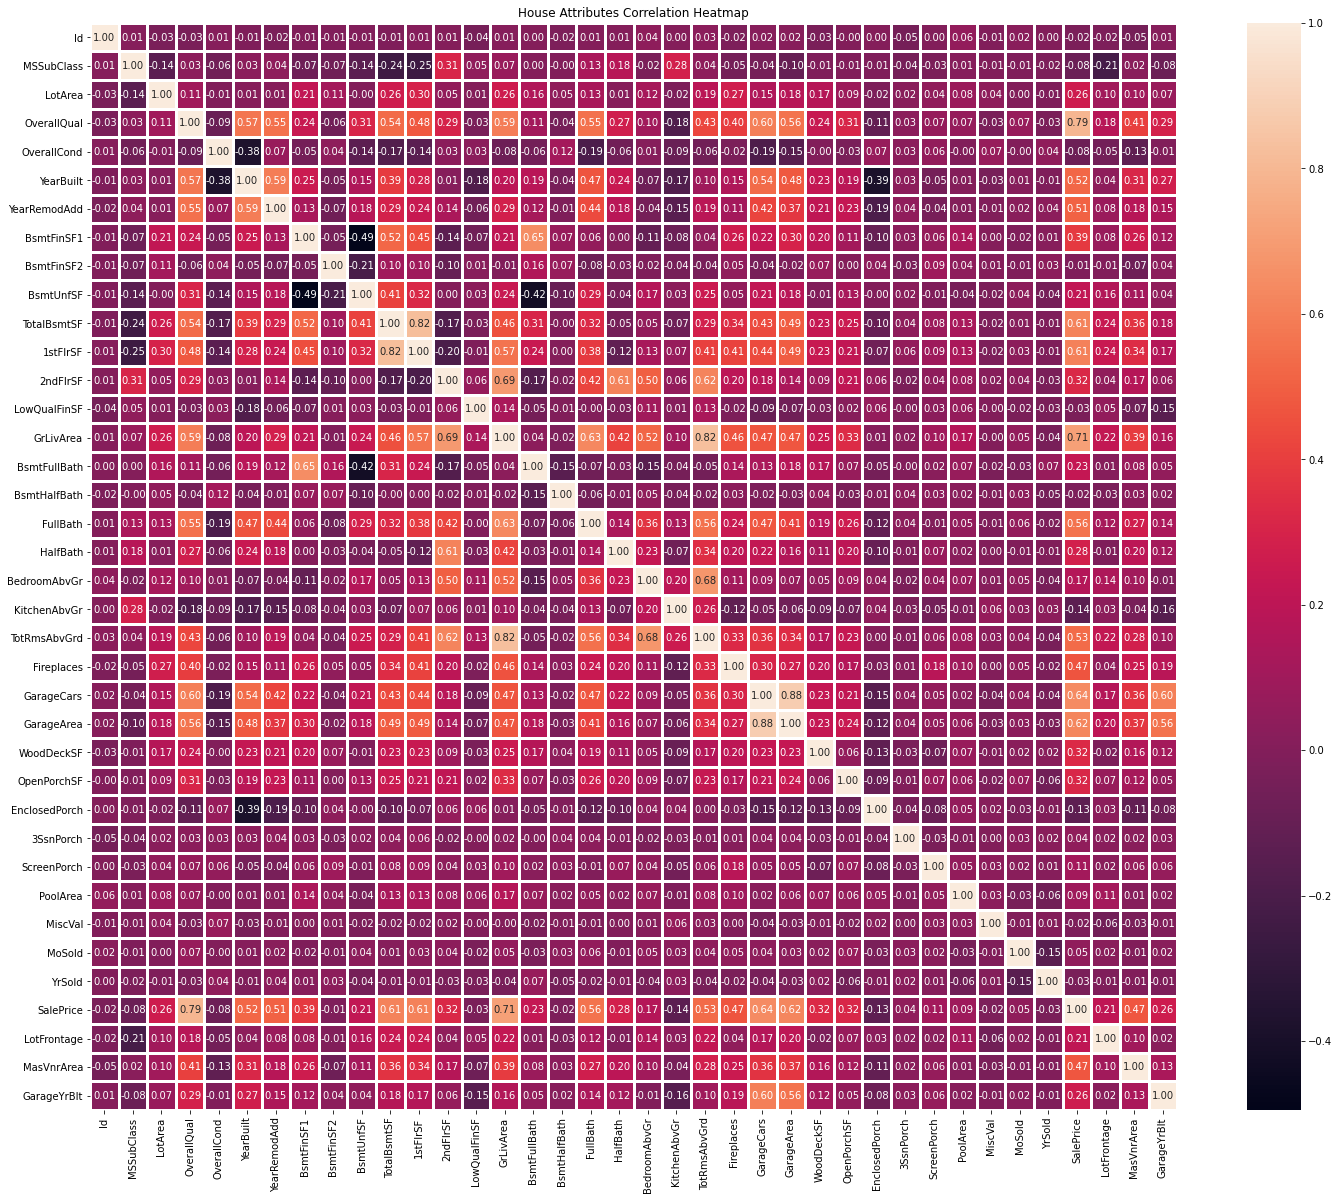

In [43]:
plt.figure(figsize=(25,20))
corr = dfnum.corr()
sns.heatmap(round(corr, 3), 
            annot=True, 
            fmt='.2f',
            square=True,
            linewidth=3,
            linecolor="white")
plt.title("House Attributes Correlation Heatmap")
plt.show()

In [296]:
num_columns=corr[corr['SalePrice']>=0.3].index

In [297]:
len(num_columns)

17

In [298]:
dfnum=dfnum[num_columns]
dfnum

OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  TotalBsmtSF  1stFlrSF  \
0               7       2003          2003         706          856       856   
1               6       1976          1976         978         1262      1262   
2               7       2001          2002         486          920       920   
3               7       1915          1970         216          756       961   
4               8       2000          2000         655         1145      1145   
...           ...        ...           ...         ...          ...       ...   
1455            6       1999          2000           0          953       953   
1456            6       1978          1988         790         1542      2073   
1457            7       1941          2006         275         1152      1188   
1458            5       1950          1996          49         1078      1078   
1459            5       1965          1965         830         1256      1256   

      2ndFlrSF  GrLivArea  FullBath  TotRmsAbvGrd  Fireplaces  GarageCars  \
0          854       1710         2             8           0           2   
1            0       1262         2             6           1           2   
2          866       1786         2             6           1           2   
3          756       1717         1             7           1           3   
4         1053       2198         2             9           1           3   
...        ...        ...       ...           ...         ...         ...   
1455       694       1647         2             7           1           2   
1456         0       2073         2             7           2           2   
1457      1152       2340         2             9           2           1   
1458         0       1078         1             5           0           1   
1459         0       1256         1             6           0           1   

      GarageArea  WoodDeckSF  OpenPorchSF  SalePrice  MasVnrArea  
0            548           0           61     208500       196.0  
1            460         298            0     181500         0.0  
2            608           0           42     223500       162.0  
3            642           0           35     140000         0.0  
4            836         192           84     250000       350.0  
...          ...         ...          ...        ...         ...  
1455         460           0           40     175000         0.0  
1456         500         349            0     210000       119.0  
1457         252           0           60     266500         0.0  
1458         240         366            0     142125         0.0  
1459         276         736           68     147500         0.0  

[1460 rows x 17 columns]

##### Remove the outliers

In [3]:
!pip install pandas plotnine

  Using cached plotnine-0.10.1-py3-none-any.whl (1.2 MB)
  Using cached mizani-0.8.1-py3-none-any.whl (64 kB)
  Using cached pandas-1.5.2-cp38-cp38-win_amd64.whl (11.0 MB)
  Using cached matplotlib-3.6.2-cp38-cp38-win_amd64.whl (7.2 MB)
  Using cached statsmodels-0.13.5-cp38-cp38-win_amd64.whl (9.2 MB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached contourpy-1.0.6-cp38-cp38-win_amd64.whl (163 kB)
  Using cached backports.zoneinfo-0.2.1-cp38-cp38-win_amd64.whl (38 kB)
  Using cached palettable-3.3.0-py2.py3-none-any.whl (111 kB)
  Using cached tzdata-2022.7-py2.py3-none-any.whl (340 kB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
  Using cached packaging-22.0-py3-none-any.whl (42 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
   

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
from plotnine import *

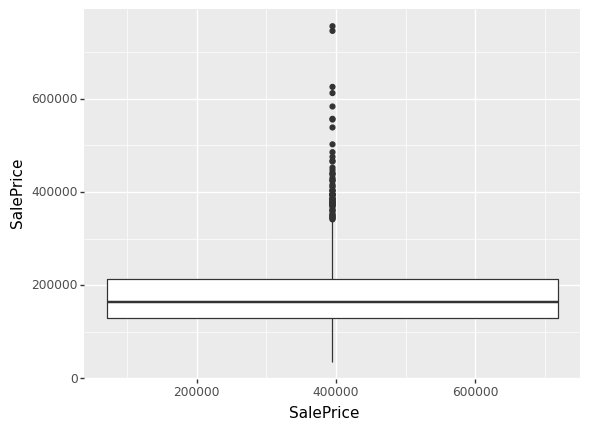

<ggplot: (110137964924)>

In [49]:
ggplot(df, aes(x = 'SalePrice', y = 'SalePrice')) + geom_boxplot()

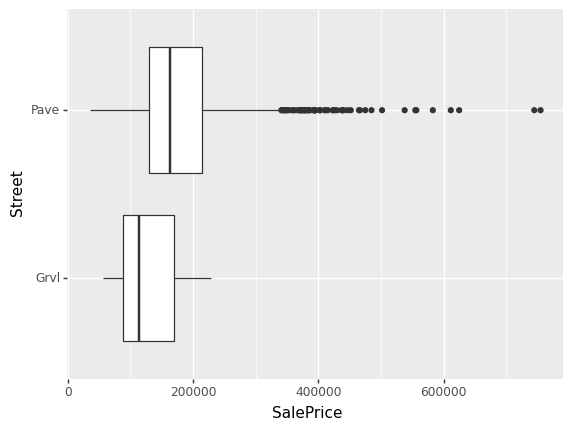

<ggplot: (93964473772)>

In [50]:
ggplot(df, aes('Street', 'SalePrice')) + geom_boxplot() + coord_flip()

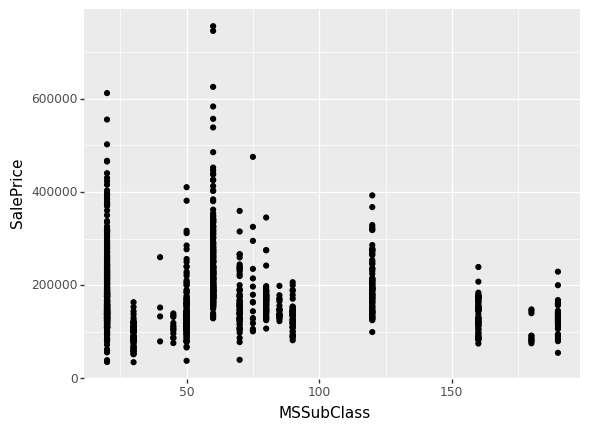

<ggplot: (110138017064)>

In [50]:
ggplot(df, aes('MSSubClass', 'SalePrice')) + geom_point()

In [94]:
from scipy.stats import norm
from scipy.stats import multivariate_normal as mn
def z_score(df,threshold=1):
    mean, std = np.mean(df), np.std(df)
    z_score = np.abs((df - mean) / std)
    good = z_score < threshold
    print(f"z-score of {threshold} corresponds to a prob of {100 * 2 * norm.sf(3):0.2f}%")
    print(f"Rejection {(~good).sum()} points")
    return good

In [95]:
z_score(df,threshold=2)

z-score of 2 corresponds to a prob of 0.27%
Rejection 1stFlrSF          55
2ndFlrSF          48
3SsnPorch         23
BedroomAbvGr      85
BldgType        1460
                ... 
Utilities       1460
WoodDeckSF        67
YearBuilt         47
YearRemodAdd       0
YrSold             0
Length: 76, dtype: int64 points


1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BldgType  BsmtCond  \
0         True      True       True          True     False     False   
1         True      True       True          True     False     False   
2         True      True       True          True     False     False   
3         True      True       True          True     False     False   
4         True      True       True          True     False     False   
...        ...       ...        ...           ...       ...       ...   
1455      True      True       True          True     False     False   
1456     False      True       True          True     False     False   
1457      True      True       True          True     False     False   
1458      True      True       True          True     False     False   
1459      True      True       True          True     False     False   

      BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtFinType1  ...  SaleType  \
0            False        True        True         False  ...     False   
1            False        True        True         False  ...     False   
2            False        True        True         False  ...     False   
3            False        True        True         False  ...     False   
4            False        True        True         False  ...     False   
...            ...         ...         ...           ...  ...       ...   
1455         False        True        True         False  ...     False   
1456         False        True        True         False  ...     False   
1457         False        True        True         False  ...     False   
1458         False        True       False         False  ...     False   
1459         False        True        True         False  ...     False   

      ScreenPorch  Street  TotRmsAbvGrd  TotalBsmtSF  Utilities  WoodDeckSF  \
0            True   False          True         True      False        True   
1            True   False          True         True      False        True   
2            True   False          True         True      False        True   
3            True   False          True         True      False        True   
4            True   False          True         True      False        True   
...           ...     ...           ...          ...        ...         ...   
1455         True   False          True         True      False        True   
1456         True   False          True         True      False       False   
1457         True   False          True         True      False        True   
1458         True   False          True         True      False       False   
1459         True   False          True         True      False       False   

      YearBuilt  YearRemodAdd  YrSold  
0          True          True    True  
1          True          True    True  
2          True          True    True  
3          True          True    True  
4          True          True    True  
...         ...           ...     ...  
1455       True          True    True  
1456       True          True    True  
1457       True          True    True  
1458       True          True    True  
1459       True          True    True  

[1460 rows x 76 columns]

In [99]:
gr=pd.DataFrame(z_score(df['SalePrice'],threshold=3))
dist=gr[gr['SalePrice']==False].index
dist

z-score of 3 corresponds to a prob of 0.27%
Rejection 22 points


Int64Index([  58,  178,  185,  349,  389,  440,  473,  496,  527,  591,  664,
             691,  769,  798,  803,  898, 1046, 1142, 1169, 1182, 1243, 1373],
           dtype='int64')

z-score of 2 corresponds to a prob of 0.27%
Rejection 63 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 22 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 9 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 5 points


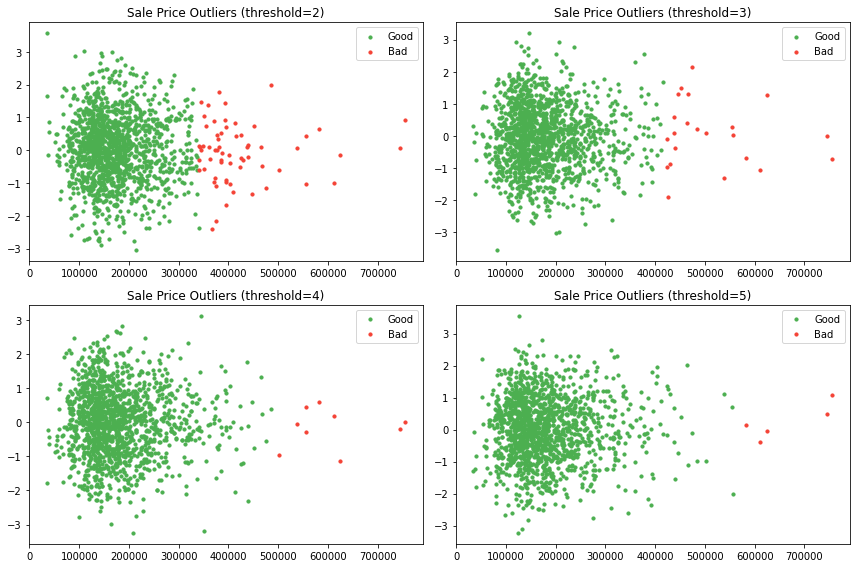

In [100]:
plt.figure(figsize=(12, 8))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score(data['SalePrice'], threshold=threshold)
    plt.scatter(data['SalePrice'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['SalePrice'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"Sale Price Outliers (threshold={threshold})")

plt.tight_layout()

In [101]:
import plotly.express as px

In [102]:
fig=px.box(dfnum,x='SalePrice',title='Box plot for SalePrice')
fig.show()

### Pre-processing

#### Prediction only on the quantitatives variables

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [203]:
#print(np.where(dfnum['SalePrice']>500000))

(array([ 178,  440,  691,  769,  803,  898, 1046, 1169, 1182], dtype=int64),)


In [303]:
gr=pd.DataFrame(z_score(dfnum['SalePrice'],threshold=8))
dist=gr[gr['SalePrice']==False].index
dist

z-score of 8 corresponds to a prob of 0.27%
Rejection 0 points


Int64Index([], dtype='int64')

In [ ]:
#dfnum.drop([ 178,  440,  691,  769,  803,  898, 1046, 1169, 1182],axis=0,inplace=True)

In [304]:
dfnum.drop(list(dist),axis=0,inplace=True)

In [305]:
Normalisation=StandardScaler()

In [306]:
target=dfnum['SalePrice']
target=target.values.reshape(-1,1)

In [307]:
target=Normalisation.fit_transform(target)

In [308]:
train=dfnum.drop('SalePrice',axis=1)

In [309]:
train=Normalisation.fit_transform(train)

In [310]:
train

array([[ 0.65147924,  1.05099379,  0.87866809, ..., -0.75217584,
         0.21650316,  0.51410389],
       [-0.07183611,  0.15673371, -0.42957697, ...,  1.62619479,
        -0.70448325, -0.57075013],
       [ 0.65147924,  0.9847523 ,  0.83021457, ..., -0.75217584,
        -0.07036146,  0.32591493],
       ...,
       [ 0.65147924, -1.00249232,  1.02402865, ..., -0.75217584,
         0.20140502, -0.57075013],
       [-0.79515147, -0.70440562,  0.53949344, ...,  2.16891024,
        -0.70448325, -0.57075013],
       [-0.79515147, -0.20759447, -0.96256569, ...,  5.12192075,
         0.32219013, -0.57075013]])

In [311]:
X_train,X_test,Y_train,Y_test=train_test_split(train,target,test_size=0.2,random_state=142)

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

In [312]:
Lr=LinearRegression()

[ 233  282  331  381  430  479  528  577  627  676  725  774  823  872
  922  971 1020 1069 1118 1168]


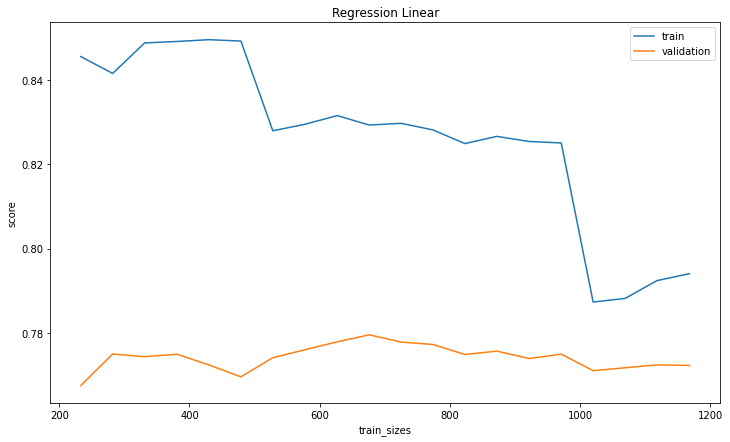

In [313]:
plt.figure(figsize=(12,7))
N,train_score, val_score=learning_curve(Lr,train,target,train_sizes=np.linspace(0.2,1.0,20),cv=5)
print(N)
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.ylabel('score')
plt.title('Regression Linear')
plt.legend()

In [314]:
Lr.fit(X_train,Y_train)

LinearRegression()

In [315]:
print(Lr.score(X_train,Y_train))

0.7848515738517569


In [316]:
y_pred=Lr.predict(X_test)
print(y_pred)

[[ 1.12356456e-01]
 [ 1.39520312e-01]
 [-1.02893739e-01]
 [ 2.47112121e-01]
 [ 1.21250651e+00]
 [-1.77417953e-01]
 [-4.40222155e-01]
 [ 7.28716197e-01]
 [-2.85954759e-02]
 [ 1.23277799e-01]
 [-1.05157613e+00]
 [-4.50310288e-01]
 [-2.88613874e-01]
 [-1.18993753e+00]
 [ 1.58882954e-01]
 [-1.11946123e+00]
 [ 3.58481212e-01]
 [ 1.59461841e-01]
 [-6.35734437e-01]
 [-1.04667659e+00]
 [ 2.45734232e-01]
 [-5.47845424e-01]
 [-1.04407346e-01]
 [ 1.21221588e+00]
 [-5.65304266e-01]
 [-1.08093921e-01]
 [ 1.78408396e-01]
 [-7.18619025e-01]
 [ 6.44122890e-01]
 [ 1.52083708e-01]
 [ 1.64940502e+00]
 [-8.15710393e-01]
 [-9.92165469e-01]
 [-5.32186877e-01]
 [-1.09614441e+00]
 [ 4.52163393e-01]
 [-6.37080638e-01]
 [-8.52913598e-02]
 [-7.08265633e-01]
 [-1.31587704e+00]
 [ 8.46019354e-02]
 [ 1.15079219e+00]
 [-1.53821473e+00]
 [-6.42098722e-01]
 [-5.92059828e-01]
 [-6.02646932e-01]
 [ 6.93092450e-01]
 [-1.23557702e+00]
 [-1.54817366e+00]
 [ 1.08515035e+00]
 [ 7.49622997e-01]
 [-1.00378269e-01]
 [ 4.5721246

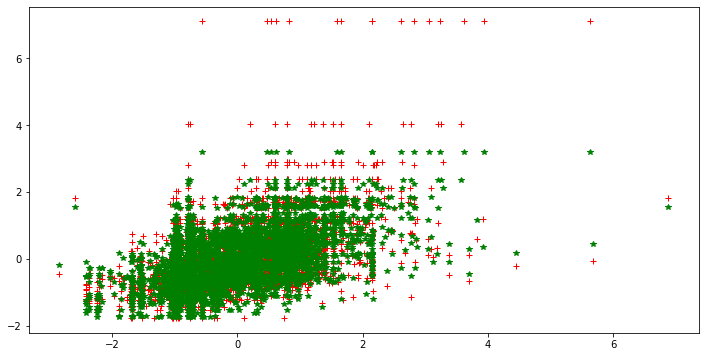

In [317]:
plt.figure(figsize=(12,6))
plt.plot(X_test,Y_test,'+',color='red')
plt.plot(X_test,y_pred,'*',color='green')

I see that the model don't predict good the outliers

In [211]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [318]:
print(r2_score(Y_test,y_pred))

0.8136410935854644


In [319]:
print('mean_square_error is:',mean_squared_error(Y_test,y_pred))
print('mean_square_error is:',mean_absolute_error(Y_test,y_pred))

mean_square_error is: 0.1614348336570494
mean_square_error is: 0.270630876050598


### Gradient Boosting Regression

In [320]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

In [322]:
params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4)

In [325]:
clf_pred=clf.predict(X_test)
clf_pred= clf_pred.reshape(-1,1)

In [349]:
print(r2_score(Y_test,clf_pred))

0.8844585396216553


In [328]:
print('mean_square_error is:',mean_squared_error(Y_test,clf_pred))
print('mean_square_error is:',mean_absolute_error(Y_test,clf_pred))

mean_square_error is: 0.10008867724937338
mean_square_error is: 0.20735154432422645


### Decision Tree Regression 

In [330]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=100)

In [331]:
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

In [350]:
print(r2_score(Y_test,dtr_pred))

0.7319102898132368


In [332]:
print('mean_square_error is:',mean_squared_error(Y_test,dtr_pred))
print('mean_square_error is:',mean_absolute_error(Y_test,dtr_pred))

mean_square_error is: 0.23223477000287346
mean_square_error is: 0.33060426553921013


### Support Vector Machine Regression 

In [334]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, Y_train)

SVR()

In [335]:
svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)

In [351]:
print(r2_score(Y_test,svr_pred))

0.7686403575317025


In [336]:
print('mean_square_error is:',mean_squared_error(Y_test,svr_pred))
print('mean_square_error is:',mean_absolute_error(Y_test,svr_pred))

mean_square_error is: 0.20041706680626276
mean_square_error is: 0.22195017410553525


### Random Forest Regression

In [338]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [340]:
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

In [352]:
print(r2_score(Y_test,rfr_pred))

0.8731207422378178


In [341]:
print('mean_square_error is:',mean_squared_error(Y_test,rfr_pred))
print('mean_square_error is:',mean_absolute_error(Y_test,rfr_pred))

mean_square_error is: 0.10991013129153121
mean_square_error is: 0.22236334817110662


### LightGBM

In [343]:
!pip install lightgbm

In [344]:
import lightgbm as lgb

In [354]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000
}

In [355]:
gbm = lgb.LGBMRegressor(**hyper_params)

In [356]:
gbm.fit(X_train, Y_train,
        eval_set=[(X_test, Y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.005, max_bin=512, max_depth=8,
              metric=['l1', 'l2'], num_iterations=100000, num_leaves=128,
              objective='regression', task='train', verbose=0)

In [357]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.1, n_estimators=500,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [358]:
model_lgb.fit(X_train,Y_train)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              feature_fraction=0.2319, feature_fraction_seed=9, max_bin=55,
              min_data_in_leaf=6, min_sum_hessian_in_leaf=11, n_estimators=500,
              num_leaves=5, objective='regression')

In [359]:
lgb_pred = model_lgb.predict(X_test)
lgb_pred = lgb_pred.reshape(-1,1)

In [360]:
print(r2_score(Y_test,lgb_pred))

0.8938528150544626


In [361]:
print('mean_square_error is:',mean_squared_error(Y_test,lgb_pred))
print('mean_square_error is:',mean_absolute_error(Y_test,lgb_pred))

mean_square_error is: 0.09195081402082286
mean_square_error is: 0.20419587946952678
